# Pymaceuticals Inc.
---

### Analysis

After reviewing the results of this experiment, I am pleased to share that our new treatment, Capomulin, performed very well in tests against the other drug regimens for squamous cell carcinoma. This test started with 248 mice, divided fairly equally between male and female subjects. Mice were evenly split among 10 different drug regimens, including a placebo group. Over the 45 days, or “timepoints,” of this experiment, these mice were observed and had their tumor volumes measured in cubic millimeters or “mm3.” 

The data came fairly consistent, and we did not see and significant outliers in any regimen. The standard deviation and errors were all well within bounds and as you will soon see the Capomulin data was more consistent than most other regimens with a lower variance, deviation and errors. We feel comfortable moving forward with the data and trust our outcomes for analysis. 

Over all categories measured, Capomulin, out-performed mostly all other regimens, apart from Ramicane.  It’s success was very consistent with that of Ramicane throughout the study and both drugs performed very well decreasing tumor volume by nearly 12%. 

Beginning with an average tumor volume of 45mm3, Capomulin’s average tumor volume at the end of the study was 40.68mm3, nearly identical to Ramicane with an average tumor volume of 40.22mm3. All other regimen were over 50mm3, showing that they did not successfully treat or reduce tumor volume. 

Capomulin was also able to keep the spread in greater control that all other regimen apart from Ramicane. At the end of the study, the average metastatic sites were .71 with Capomulin, coming in just over Ramicane's .55.  The other regimens combined average was 1.5, or nearly double Capomulin. 

As a result, the mice treated with Capomulin and Ramicane, lived an average of 5 days longer than those treated with the other regimens. 

In conclusion, it is safe to assume that we are on to something here! Capomulin definitely deserves a chance for further study and development.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as npfrom 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
full_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

len(full_results["Mouse ID"].unique())



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouse_ids = full_results["Mouse ID"].unique()

dupe_mice = []

for mouse in mouse_ids:
    occurance = []
    timepoint = full_results[full_results["Mouse ID"] == mouse]["Timepoint"]
    for t in timepoint:
        if t in occurance:
            dupe_mice.append(mouse)
            break
        occurance.append(t)
        
dupe_mice



['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989 = full_results.loc[full_results["Mouse ID"] == "g989",:]

mouse_g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_mouse_g989 = mouse_g989.index
clean_results = full_results.drop(index_mouse_g989)

In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_results["Mouse ID"].unique())


248

## Summary Statistics

In [7]:
#clean_results

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = clean_results.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
regimen_median = clean_results.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
regimen_var = clean_results.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
regimen_stdev = clean_results.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
regimen_sem = clean_results.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = pd.DataFrame({"Tumor - Mean": regimen_mean, "Tumor - Median": regimen_median,
                            "Tumor - Variance": regimen_var, "Tumor - Standard Dev": regimen_stdev,
                            "Tumor - SEM": regimen_sem})

regimen_stats



,Tumor - Mean,Tumor - Median,Tumor - Variance,Tumor - Standard Dev,Tumor - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

list_regimen_agg = clean_results.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median', 'var', 'std', 'sem']})
#list_regimen_agg
list_regimen_stats = pd.DataFrame(list_regimen_agg)
list_regimen_stats 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

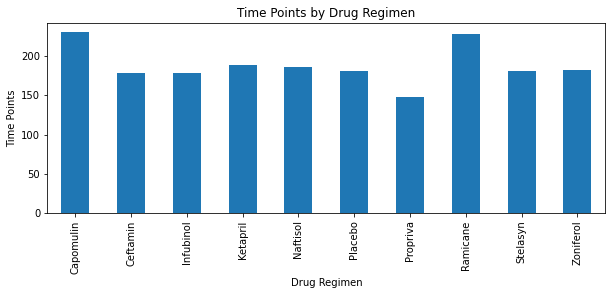

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.  

# Count timepoints 

gb_time_by_regimen = clean_results.groupby(["Drug Regimen"]).count()["Timepoint"]

gb_time_by_regimen.plot(kind="bar", figsize=(10,3.5))
plt.title("Time Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.show




<function matplotlib.pyplot.show(*args, **kw)>

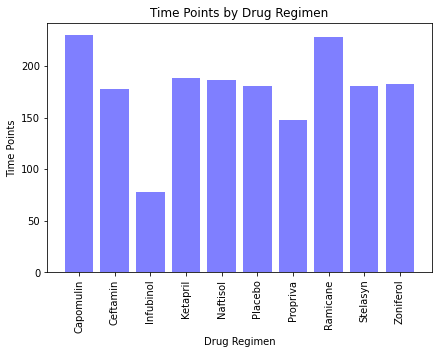

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_drug = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
bar_time = [230, 178, 78, 188, 186, 181, 148, 228, 181, 182]
bar_plot = plt.bar(bar_drug, bar_time, color = "blue", alpha=.5, align="center")
plt.tight_layout()
plt.xticks(rotation=90)

plt.title("Time Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.show


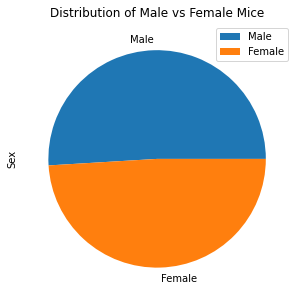

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mvf = clean_results["Sex"].value_counts()
#mvf

### CG: M 958 / F 922

df = pd.DataFrame({'Sex': [958, 922]},
                  index = ['Male', 'Female'])
plot = df.plot.pie(y='Sex', figsize=(5, 5))


plt.title("Distribution of Male vs Female Mice")

plt.show()


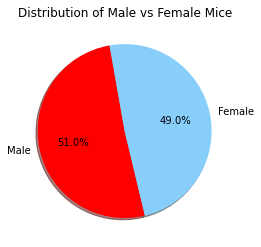

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mvf = clean_results["Sex"].value_counts()
#mvf

### CG: M 958 / F 922

labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["red", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("Distribution of Male vs Female Mice")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

gb_max_tp = clean_results.groupby(['Mouse ID'], sort=False)["Timepoint"].max()
last_tp = pd.DataFrame({"Last Timepoint": gb_max_tp})
#last_tp

#Merge this group df with the original DataFrame to get te tumor volume at the last timepoint
final_results = pd.merge(clean_results, last_tp, on = ["Mouse ID"])

#final_results['Last Timepoint'].count()
#final_results['Timepoint'].count()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drug = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

last_tumor = final_results.loc[final_results["Last Timepoint"] == final_results["Timepoint"],:]
last_tumor = last_tumor.set_index("Drug Regimen")

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#last_tumor.describe()
last_tumor_size = last_tumor['Tumor Volume (mm3)']
#last_tumor_size.describe()

quartiles = last_tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


####### CG: IQR = 19.177757 (or 65.053624 - 45.875867 = 19.177757)
#######     IQR*1.5 = 28.766635
#######     Lower Bound = 17.109232 (45.875867 - IQR*1.5) 
#######     Upper Bound = 93.820259 (65.053624 + IQR*1.5)
#######     Min = 22.050126 / Max = 78.567.14
#######     All subjects are within our lower and upper bounds, there are no outliers in the final tumor volumes.


# Locate the rows which contain mice on each drug and get the tumor volumes.
# Determine outliers using upper and lower bounds 

#"Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# last_tumor_size_all= last_tumor.loc[drug,['Tumor Volume (mm3)']]
# #last_tumor_size_all

# last_tumor_size_cap= last_tumor.loc["Capomulin",['Tumor Volume (mm3)']]
# #last_tumor_size_cap.describe()
# ###### CG: Lower Bound = 20.685 / Upper Bound = 51.845 / No Outliers

# last_tumor_size_inf= last_tumor.loc["Infubinol",['Tumor Volume (mm3)']]
# #last_tumor_size_inf.describe()
# ###### CG: Lower Bound = 36.845 / Upper Bound = 82.725/ Possible outlier at 36.32

# last_tumor_size_ket= last_tumor.loc["Ketapril",['Tumor Volume (mm3)']]
# #last_tumor_size_ket.describe()
# ###### CG: Lower Bound = 36.995 / Upper Bound = 89.59 / No Outliers

# last_tumor_size_naf= last_tumor.loc["Naftisol",['Tumor Volume (mm3)']]
# #last_tumor_size_naf.describe()
# ###### CG: Lower Bound = 26.255 / Upper Bound = 103.355 / No Outliers

# last_tumor_size_pla= last_tumor.loc["Placebo",['Tumor Volume (mm3)']]
# #last_tumor_size_pla.describe()
# ###### CG: Lower Bound = 30.155 / Upper Bound = 90.915 / No Outliers

# last_tumor_size_pro= last_tumor.loc["Propriva",['Tumor Volume (mm3)']]
# #last_tumor_size_pro.describe()
# ###### CG: Lower Bound = 28.765 / Upper Bound = 83.045 / No Outliers

# last_tumor_size_ram= last_tumor.loc["Ramicane",['Tumor Volume (mm3)']]
# #last_tumor_size_ram.describe()
# ###### CG: Lower Bound = 18 / Upper Bound = 54.22 / No Outliers

# last_tumor_size_ste= last_tumor.loc["Stelasyn",['Tumor Volume (mm3)']]
# #last_tumor_size_ste.describe()
# ###### CG: Lower Bound = 27.55 / Upper Bound = 94.03/ No Outliers

# last_tumor_size_zon= last_tumor.loc["Zoniferol",['Tumor Volume (mm3)']]
# #last_tumor_size_zon.describe()
# ###### CG: Lower Bound = 19.785 / Upper Bound = 92.015 / No Outliers

    

<function matplotlib.pyplot.show(*args, **kw)>

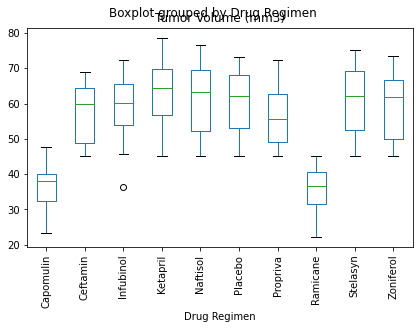

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

last_tumor.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

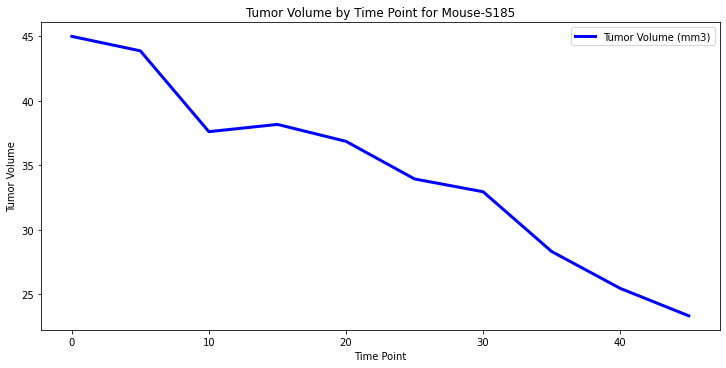

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#s185 = clean_results.loc[clean_results["Mouse ID"] == "s185"
cap_s185 = clean_results.loc[clean_results["Mouse ID"] == "s185",["Timepoint", 'Tumor Volume (mm3)']]
cap_s185_df = pd.DataFrame(cap_s185)
cap_s185_df = cap_s185_df.set_index("Timepoint")
cap_s185_df

cap_s185_df.plot(kind="line", figsize=(10,5), color=["b"], linewidth=3)
plt.tight_layout()
plt.title("Tumor Volume by Time Point for Mouse-S185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.show



## Correlation and Regression

<function matplotlib.pyplot.show(*args, **kw)>

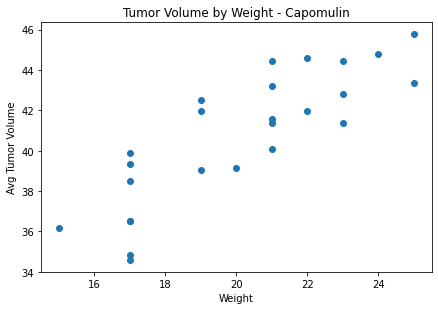

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 

cap = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:]
cap_idv = cap.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
cap_idw = cap.groupby('Mouse ID').mean()['Weight (g)']

cap_tvw_df = pd.DataFrame({"Tumor Vol": cap_idv, "Weight": cap_idw})
cap_tvw_df = cap_tvw_df.reset_index(drop=False)
cap_tvw_df = cap_tvw_df.set_index('Weight')
cap_tvw_df
cap_tvw_df = cap_tvw_df.reset_index(drop=False)

x_axis = cap_tvw_df['Weight']
y_axis = cap_tvw_df['Tumor Vol']

plt.scatter(x_axis,y_axis)
plt.tight_layout()
plt.title("Tumor Volume by Weight - Capomulin")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume")
plt.show


The correlation between both factors is 0.84


C:\Users\chane\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


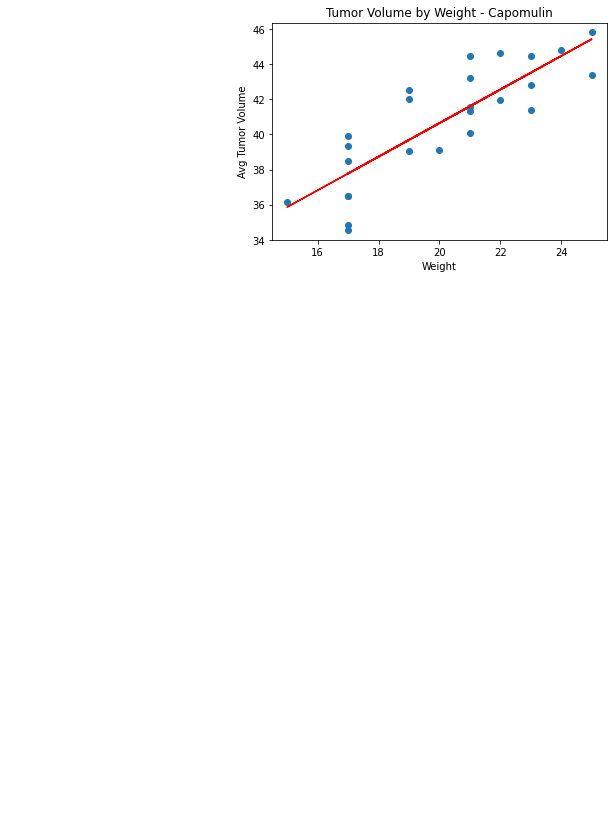

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = cap_tvw_df['Weight']
y_axis = cap_tvw_df['Tumor Vol']

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.title("Tumor Volume by Weight - Capomulin")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume")
plt.show
print(f"The correlation between both factors is {round(correlation[0],2)}")


In [19]:
#unique_id = final_results.loc[final_results['Timepoint'] == 0, :]
#unique_id.min()
#others_sans_cap = final_results.loc[final_results['Drug Regimen'] != "Capomulin", :]
# others_total = others_sans_cap.loc[final_results['Drug Regimen'] != "Ramicane", :]
# others_total.mean()
# others_sans_cap.mean()
# #cap.mean()

Mouse ID                   a203
Drug Regimen          Capomulin
Sex                      Female
Age_months                    1
Weight (g)                   15
Timepoint                     0
Tumor Volume (mm3)           45
Metastatic Sites              0
Last Timepoint                0
dtype: object